In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Introduction

This short data analysis project tries to answer the question what extent attitudes towards migration affected the decision to vote in the 2017 Austrian National Council election. The following hypothesis will be tested: The more negative a person was towards the issue of migration, the more likely they voted for the FPÖ or the ÖVP. Using the Michigan-Modell (Campbell et al., 1960) on a theoretical basis, a multinominal logistic regression has been conducted to solve the research problem. The European Social Survey (2018) was used as the data set for the investigation.

### Variables

Here is a short listing of the variables used for the analysis:
#### Dependent variable:
Party voted for in Austrian national council election 2017 (prtvtcat)
#### Independent variable:
Attitude toward migration (migindex)
#### Control variables:
Party identity (how close you are to a party over a longer period of time, prtdgcl)\
Education level (edlveat)\
Socio-economic status (was measured in terms of household income, hinctnta)\
Gender (gndr)\
Age (agea)\
Political news consumption (measured in minutes, nwspol)

### Loading and formatting the dataset

In [2]:
pd.set_option('float_format', '{:f}'.format)

In [3]:
df_total = pd.read_csv('C:/Users/maxmo/Desktop/Datasets/ESS9_total.csv')

C:\Users\maxmo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,7,9,10,11,12,19,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,97,102,114,115,116,118,119,120,121,122,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,167,184,185,186,187,191,192,193,194,195,196,197,198,199,200,203,205,207,214,230,231,232,235,236,243,244,245,246,247,248,249,250,251,252,253,259,260,261,262,263,264,265,266,267,273,274,275,276,277,278,279,280,281,283,285,287,288,290,291,292,293,294,295,296,298,299,300,301,302,304,305,306,307,308,309,310,311,312,314,315,317,318,319,320,321,322,323,324,325,326,340,341,359,362,363,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,

In [4]:
# limiting the dataset to Austria
df = df_total.iloc[0:2499, :]

### Dependent variable: party voted for in Austrian national council election 2017

In [5]:
df.prtvtcat.value_counts(dropna=False)

2     604
1     573
.a    503
3     301
.b    246
5     133
7      49
.c     41
4      29
9       9
6       8
8       3
Name: prtvtcat, dtype: int64

In [6]:
for x in ['.a', '.b', '.c']:
    df.loc[df.prtvtcat == x, 'prtvtcat'] = np.nan

C:\Users\maxmo\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [7]:
conversion = {'1':'SPÖ', '2':'ÖVP', '3':'FPÖ', '4':'Pilz', '5':'Grüne', '6':'Other','7':'NEOS','8':'Other', '9':'Other'}
df.prtvtcat = df.prtvtcat.map(conversion)

C:\Users\maxmo\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
df.prtvtcat.value_counts(dropna=False)

NaN      790
ÖVP      604
SPÖ      573
FPÖ      301
Grüne    133
NEOS      49
Pilz      29
Other     20
Name: prtvtcat, dtype: int64

### Independent variable: creating a migration index

In [9]:
for i in ['imsmetn','imdfetn', 'impcntr']:
    print(df[i].value_counts(dropna=False))

2     1173
3      542
1      524
4      204
.c      43
.b      13
Name: imsmetn, dtype: int64
3     1000
2      803
4      408
1      229
.c      41
.b      18
Name: imdfetn, dtype: int64
3     970
2     708
4     530
1     223
.c     45
.b     23
Name: impcntr, dtype: int64


In [10]:
for i in ['imsmetn','imdfetn', 'impcntr']:
    for x in ['.a', '.b', '.c', '.d']:
        df.loc[df[i] == x, i] = np.nan 
    print(df[i].value_counts(dropna=False))

2      1173
3       542
1       524
4       204
NaN      56
Name: imsmetn, dtype: int64
3      1000
2       803
4       408
1       229
NaN      59
Name: imdfetn, dtype: int64
3      970
2      708
4      530
1      223
NaN     68
Name: impcntr, dtype: int64


In [11]:
#checking data-types of variables
for i in ['imsmetn','imdfetn', 'impcntr']:
    print(df[i].dtypes)

object
object
object


In [12]:
# changing data type
for j in ['imsmetn','imdfetn', 'impcntr']:    
    df[j] = df[j].astype(float)
    print(df[j].dtypes)

float64
float64
float64


<ipython-input-12-7a4362bac7cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j] = df[j].astype(float)


In [13]:
df['migindex'] = df[['imsmetn','imdfetn', 'impcntr']].sum(axis=1)

<ipython-input-13-7d40895d5d60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['migindex'] = df[['imsmetn','imdfetn', 'impcntr']].sum(axis=1)


In [14]:
df.head()

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,inwtm,dweight,pspwght,pweight,anweight,domain,prob,stratum,psu,migindex
0,ESS9e03,9,3,10.12.2020,27,AT,60,5,180,2,...,46.000000,0.581174,0.218111,0.302091,0.065890,2.000000,0.001176,59,1688,6.000000
1,ESS9e03,9,3,10.12.2020,137,AT,10,5,20,7,...,73.000000,1.062772,0.413473,0.302091,0.124907,2.000000,0.000643,79,88,8.000000
2,ESS9e03,9,3,10.12.2020,194,AT,60,4,180,5,...,92.000000,1.376509,2.270293,0.302091,0.685836,2.000000,0.000496,11,938,7.000000
3,ESS9e03,9,3,10.12.2020,208,AT,45,5,120,3,...,134.000000,0.993399,0.386483,0.302091,0.116753,2.000000,0.000688,74,1998,8.000000
4,ESS9e03,9,3,10.12.2020,220,AT,30,1,.a,5,...,40.000000,0.377353,1.032102,0.302091,0.311789,2.000000,0.001811,99,601,9.000000


In [15]:
# looking at means of the migration index by political party
migmean = df.groupby(['prtvtcat']).mean().sort_values('migindex', ascending=False)
migmean.head()

,essround,edition,idno,imsmetn,imdfetn,impcntr,dscrrce,dscrntn,dscrrlg,dscrlng,...,inwtm,dweight,pspwght,pweight,anweight,domain,prob,stratum,psu,migindex
prtvtcat,,,,,,,,,,,,,,,,,,,,,
FPÖ,9.000000,3.000000,37021.083056,2.522184,3.194631,3.268456,0.000000,0.006645,0.006645,0.006645,...,65.737542,0.974947,0.865829,0.302091,0.261560,1.827243,0.000858,51.810631,918.920266,8.853821
ÖVP,9.000000,3.000000,34065.966887,2.203020,2.794266,2.903553,0.003311,0.004967,0.004967,0.000000,...,64.894040,1.018056,0.926596,0.302091,0.279917,1.865894,0.000832,53.087748,959.826159,7.758278
SPÖ,9.000000,3.000000,34208.322862,2.021127,2.466549,2.596803,0.003490,0.006981,0.017452,0.005236,...,67.677138,0.953119,0.947246,0.302091,0.286155,1.741710,0.000859,47.809773,946.462478,7.000000
Other,9.000000,3.000000,31298.450000,1.850000,2.100000,2.150000,0.000000,0.000000,0.000000,0.000000,...,61.800000,0.944713,1.014156,0.302091,0.306368,1.700000,0.000823,47.900000,1090.150000,6.100000
NEOS,9.000000,3.000000,35017.836735,1.645833,2.191489,2.395833,0.000000,0.020408,0.040816,0.000000,...,64.897959,1.041441,1.090862,0.302091,0.329540,1.734694,0.000810,51.877551,1006.897959,6.061224


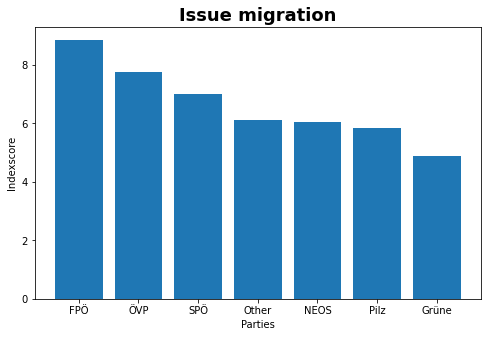

In [16]:
#displaying the distribution of the migration-index
labels = ['FPÖ', 'ÖVP', 'SPÖ', 'Other', 'NEOS', 'Pilz', 'Grüne']
values = migmean['migindex']
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title('Issue migration', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.xlabel('Parties')
plt.ylabel('Indexscore')
plt.show()

The higher the Index score, the more negativ the issue of migration is seen by the voters of a party.

### Control variable: Party identity

In [17]:
print(df.prtdgcl.value_counts(dropna=False))
print(df['prtdgcl'].dtypes)

.a    1304
2      752
3      217
1      199
.c      13
4       11
.b       3
Name: prtdgcl, dtype: int64
object


In [18]:
for x in ['.a', '.b', '.c', '.d']:
    df.loc[df.prtdgcl == x, 'prtdgcl'] = np.nan  
print(df.prtdgcl.value_counts(dropna=False))
df['prtdgcl'] = df['prtdgcl'].astype(float)
print(df['prtdgcl'].dtypes)

NaN    1320
2       752
3       217
1       199
4        11
Name: prtdgcl, dtype: int64
float64


C:\Users\maxmo\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-18-4223a18bf898>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prtdgcl'] = df['prtdgcl'].astype(float)


In [19]:
pimean = df.groupby(['prtvtcat']).mean().sort_values('prtdgcl', ascending=False)
print(pimean['prtdgcl'])

prtvtcat
Other   2.200000
NEOS    2.148148
ÖVP     2.098592
Pilz    2.071429
FPÖ     1.955307
Grüne   1.927083
SPÖ     1.917989
Name: prtdgcl, dtype: float64


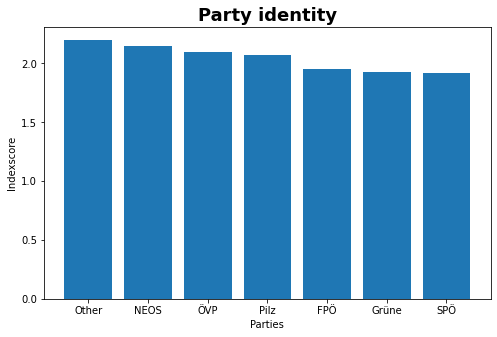

In [20]:
#displaying the distribution of party identity
labels = ['Other', 'NEOS', 'ÖVP', 'Pilz', 'FPÖ', 'Grüne', 'SPÖ']
values = pimean['prtdgcl']
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title('Party identity', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.xlabel('Parties')
plt.ylabel('Indexscore')
plt.show()

The lower the Index score, the higher the party identity of a party.

### Sociodemographics

### Education level

In [21]:
print(df.edlveat.value_counts(dropna=False))
print(df['edlveat'].dtypes)

6       554
6       401
7       185
7       136
10      122
3       121
3       100
4        99
16       77
10       76
8        75
4        65
8        60
16       51
9        44
12       34
14       29
11       28
9        24
15       23
15       20
11       20
18       19
12       17
5        16
18       14
14       14
2        13
17       12
13       11
1         9
2         8
13        8
5         7
.b        2
17        2
.c        1
5555      1
5555      1
Name: edlveat, dtype: int64
object


In [22]:
for x in ['.a', '.b', '.c', '.d', '5555']:
    df.loc[df.edlveat == x, 'edlveat'] = np.nan  
print(df.edlveat.value_counts(dropna=False))
df['edlveat'] = df['edlveat'].astype(float)
print(df['edlveat'].dtypes)

6       554
6       401
7       185
7       136
10      122
3       121
3       100
4        99
16       77
10       76
8        75
4        65
8        60
16       51
9        44
12       34
14       29
11       28
9        24
15       23
11       20
15       20
18       19
12       17
5        16
18       14
14       14
2        13
17       12
13       11
1         9
2         8
13        8
5         7
NaN       4
17        2
5555      1
Name: edlveat, dtype: int64
float64


<ipython-input-22-b3b2fef41b87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edlveat'] = df['edlveat'].astype(float)


In [23]:
edmean = df.groupby(['prtvtcat']).mean().sort_values('edlveat', ascending=False)
print(edmean['edlveat'])

prtvtcat
FPÖ     25.033223
Grüne   10.406015
Pilz    10.000000
NEOS     9.122449
Other    9.000000
SPÖ      7.756993
ÖVP      7.372517
Name: edlveat, dtype: float64


### Socio-economic status

In [24]:
print(df.hinctnta.value_counts(dropna=False))
print(df['hinctnta'].dtypes)

.b    324
2     290
4     270
5     255
3     250
7     233
6     203
8     163
1     158
9     145
.c    119
10     89
Name: hinctnta, dtype: int64
object


In [25]:
for x in ['.a', '.b', '.c', '.d']:
    df.loc[df.hinctnta == x, 'hinctnta'] = np.nan  
print(df.hinctnta.value_counts(dropna=False))
df['hinctnta'] = df['hinctnta'].astype(float)
print(df['hinctnta'].dtypes)

NaN    443
2      290
4      270
5      255
3      250
7      233
6      203
8      163
1      158
9      145
10      89
Name: hinctnta, dtype: int64
float64


<ipython-input-25-6ace78e82aae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hinctnta'] = df['hinctnta'].astype(float)


In [26]:
himean = df.groupby(['prtvtcat']).mean().sort_values('hinctnta', ascending=False)
print(himean['hinctnta'])

prtvtcat
NEOS    6.255814
ÖVP     5.360078
Grüne   5.068376
SPÖ     5.000000
FPÖ     4.698413
Pilz    4.280000
Other   4.222222
Name: hinctnta, dtype: float64


### Gender

In [27]:
print(df.gndr.value_counts(dropna=False))
print(df['gndr'].dtypes)

2    1346
1    1153
Name: gndr, dtype: int64
int64


### Age

In [28]:
print(df.agea.value_counts(dropna=False))

49    62
52    56
50    56
48    54
54    51
      ..
84     7
90     6
15     6
87     5
89     2
Name: agea, Length: 77, dtype: int64


In [29]:
print(df.agea.min())
print(df.agea.max())

.d
90


In [30]:
for x in ['.a', '.b', '.c', '.d']:
    df.loc[df.agea == x, 'agea'] = np.nan  
df['agea'] = df['agea'].astype(float)
print(df['agea'].dtypes)

float64


<ipython-input-30-c170ab1ec060>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agea'] = df['agea'].astype(float)


In [31]:
agemean = df.groupby(['prtvtcat']).mean().sort_values('agea', ascending=False)
print(agemean['agea'])

prtvtcat
ÖVP     56.362583
SPÖ     55.136364
FPÖ     50.883333
Pilz    48.000000
Other   47.000000
Grüne   46.128788
NEOS    44.612245
Name: agea, dtype: float64


### Political news consumption

In [32]:
print(df.nwspol.value_counts(dropna=False))
print(df['nwspol'].dtypes)

60     518
30     509
15     244
10     204
20     173
120    167
0      149
45     132
90     125
5       88
180     35
40      28
75      25
25      13
.d      13
240     12
35      10
150     10
2        7
80       6
360      5
50       5
300      5
105      2
3        2
420      2
70       2
65       1
14       1
140      1
130      1
85       1
600      1
18       1
1        1
Name: nwspol, dtype: int64
object


In [39]:
print(df.nwspol.min())

1.0


In [40]:
for x in ['.a', '.b', '.c', '.d', '00 00', 0.0]:
    df.loc[df.nwspol == x, 'nwspol'] = np.nan  

C:\Users\maxmo\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
df['nwspol'] = df['nwspol'].astype(float)
print(df['nwspol'].dtypes)

float64


<ipython-input-41-1de4007aeb67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nwspol'] = df['nwspol'].astype(float)


In [42]:
# looking at the mean of political news consumption accross the parties
newsmean = df.groupby(['prtvtcat']).mean().sort_values('nwspol', ascending=False)
print(newsmean['nwspol'])

prtvtcat
Pilz    58.793103
SPÖ     54.194690
Grüne   54.124031
ÖVP     50.458545
FPÖ     49.577061
Other   48.684211
NEOS    44.836735
Name: nwspol, dtype: float64


### Regression analyses

In [43]:
x1 = df[['migindex', 'prtdgcl', 'edlveat','hinctnta', 'gndr', 'agea', 'nwspol', 'prtvtcat']]
y1 = df[['migindex', 'prtdgcl', 'edlveat','hinctnta', 'gndr', 'agea', 'nwspol', 'prtvtcat']]

In [44]:
x1 = x1.dropna()
y1 = y1.dropna()

In [45]:
x = x1[['migindex', 'prtdgcl', 'edlveat','hinctnta', 'gndr', 'agea', 'nwspol']]
y = y1['prtvtcat']

In [46]:
mnlogit_mod = sm.MNLogit(y, x)
mnlogit_fit = mnlogit_mod.fit(method='bfgs', maxiter = 300)

print (mnlogit_fit.summary())

Optimization terminated successfully.
         Current function value: 1.270267
         Iterations: 135
         Function evaluations: 141
         Gradient evaluations: 141
                          MNLogit Regression Results                          
Dep. Variable:               prtvtcat   No. Observations:                  904
Model:                        MNLogit   Df Residuals:                      862
Method:                           MLE   Df Model:                           36
Date:                Sun, 30 May 2021   Pseudo R-squ.:                  0.1186
Time:                        21:59:25   Log-Likelihood:                -1148.3
converged:                       True   LL-Null:                       -1302.9
Covariance Type:            nonrobust   LLR p-value:                 3.834e-45
prtvtcat=Grüne       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
migindex          -0.7593  

Looking at the regression table, a pattern concerning the migration index can be observed. Its effect is statistically significant amongst all categories. Starting with the "Grüne" party, if the migration index rises by one unit, the chance of a vote for the "Grüne" in comparison to the "FPÖ" (reference category) drops by 76%. This trend looks similiar around all left wing parties like "Pilz" and "Others" (mostly small communist parties). For the "NEOS", a neoliberal pary, the chance of a vote drops by 53%, which suggests a rather positiv attidue toward migration among its voters for a neoliberal party. The "SPÖ" marks a rather surprising case: Its chance of losing a vote to the "FPÖ" if the migration index rises by one unit only drops by 32%, which means a surprisingly negative political stance toward the issue of migration for a social democratic party. Unsurprisingly, the logit coefficient of the "ÖVP", the second right wing party among the "FPÖ", drops the least (25%) in comparison to all other parties, confirming the hypothesis.

### References

Campbell, Angus, Philip E. Converse, Warren E. Miller und Donald F. Stokes. 1960. The American Voter. New York: Wiley.

ESS Round 9: European Social Survey Round 9 Data (2018). Data file edition 3.1. NSD - Norwegian Centre for Research Data, Norway – Data Archive and distributor of ESS data for ESS ERIC. doi:10.21338/NSD-ESS9-2018.